<a href="https://colab.research.google.com/github/DarshanSuresh/Data-Mining/blob/main/LAB_13_07_May_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 13 - 07 May 2024

## K-Means on Iris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_excel("iris.xlsx")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df['species']=df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
km = KMeans(n_clusters=3)
#km.cluster_centers_
scaler = MinMaxScaler()

In [5]:
scaler.fit(df[['sepal_length']])
df['sepal_length']=scaler.transform(df[['sepal_length']])

scaler.fit(df[['petal_length']])
df['petal_length']=scaler.transform(df[['petal_length']])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,3.5,0.067797,0.2,0
1,0.166667,3.0,0.067797,0.2,0
2,0.111111,3.2,0.050847,0.2,0
3,0.083333,3.1,0.084746,0.2,0
4,0.194444,3.6,0.067797,0.2,0


In [6]:
y_predicted=km.fit_predict(df[['sepal_length','petal_length']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

In [7]:
df['cluster']=y_predicted
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
145,0.666667,3.0,0.711864,2.3,2,2
146,0.555556,2.5,0.677966,1.9,2,0
147,0.611111,3.0,0.711864,2.0,2,2
148,0.527778,3.4,0.745763,2.3,2,0
149,0.444444,3.0,0.694915,1.8,2,0


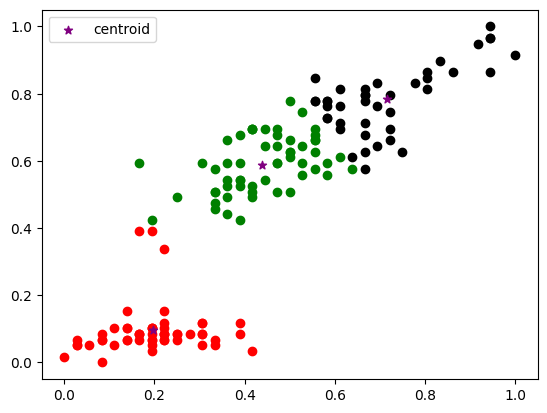

In [8]:
km.cluster_centers_
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.sepal_length,df1['petal_length'],color='green')
plt.scatter(df2.sepal_length,df2['petal_length'],color='red')
plt.scatter(df3.sepal_length,df3['petal_length'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [13]:
inertia = km.inertia_
print(inertia)


2.728605521636018
